# Classificação com Regressão Logística

Com um dataset que possuí dados fictícios representando os viajantes a bordo do navio titanic, irei fazer uma análise para entender se um viajante com determinadas características seria ou não sobrevivente do acidente com o navio.

## Carregando o dataset e fazendo algumas análises iniciais

In [1]:
import pandas as pd
dataset = pd.read_csv('./titanic_train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Gostaria de visualizar as colunas com valores nulos, para entender os possíveis impactos nos treinamentos dos modelos**

<AxesSubplot:>

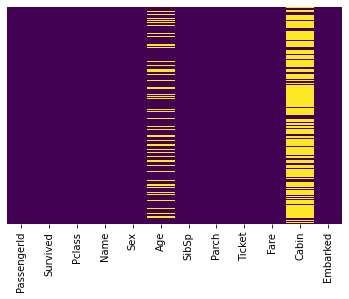

In [2]:
import seaborn as sns
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Com esse mapa de calor é possível observar que existe alguns valores nulos para a coluna 'Age' e muitos valores nulos para a coluna 'Cabin'**
Como a a coluna Age tem uma boa quantidade de valores preenchidos (a maioria), irei utilizar alguma técnica para preencher os valores nulos com valores que provavelmente seriam corretos. Já a coluna Cabin que possui a maioria de valores nulos, irei elimina-la do dataset.

## Relação da coluna 'Age' com algumas outras colunas

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

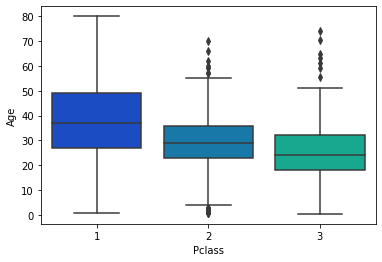

In [3]:
# Age com Pclass
sns.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

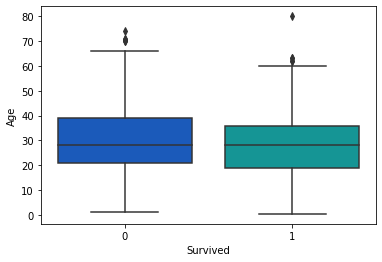

In [4]:
# Age com Survived
sns.boxplot(x='Survived',y='Age',data=dataset,palette='winter')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

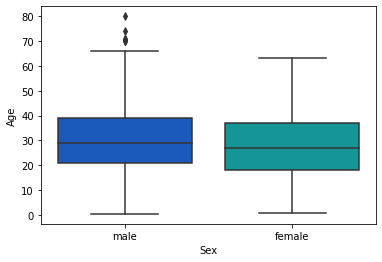

In [5]:
# Age com Sex
sns.boxplot(x='Sex',y='Age',data=dataset,palette='winter')

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

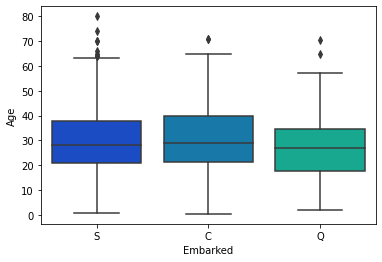

In [6]:
# Age com Embarked
sns.boxplot(x='Embarked',y='Age',data=dataset,palette='winter')

**Com esses gráficos pude notar que a relação de Age com Pclass tem uma média com maior grau de releância para uma decisão de preenchimento, pois, com as outras colunas, a média acaba sendo muito parecida**

In [7]:
# Uma função para analisar os registros com 'Age' null e verificar qual a PClass e assim 
# preencher uma idade com o base na média de idade por classe

def impute_age(cols):
    age = cols[0]
    p_class = cols[1]
    if pd.isnull(age):
        if p_class == 1:
            return 37
        elif p_class == 2:
             return 29
        else:
             return 24
    else:
        return age

In [8]:
# fazendo o preenchimento com a função acima
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

# Enfim, eliminando a coluna 'Cabin'
dataset.drop('Cabin',axis=1,inplace=True)

In [9]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Quero fazer mais trabalho de preparação, gostaria de deixar as colunas 'Sex' e 'Embarked' com valores binários, ou seja, transformar a coluna 'Sex' em 'male' por exemplo, e os valores serão 0 ou 1. A função get_dummies do pandas faz isso magicamente**

In [10]:
pd.get_dummies(dataset['Sex'],drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [11]:
binared_sex = pd.get_dummies(dataset['Sex'],drop_first=True)
binared_embarked = pd.get_dummies(dataset['Embarked'],drop_first=True)

In [12]:
# Eliminando as colunas com valores de texto que podem não ajudar no encontro de padrões
dataset.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [13]:
dataset = pd.concat([dataset,binared_sex,binared_embarked],axis=1)
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


**Agora eu estou com o dataset como gostaria para começar a trabalhar com a regressão logística e criar um modelo que vai identificar se o viajante seria ou não um sobrevivente do titanic**

## Regressão logística

**Para utilizar o alrogítmo de regressão logística, vou precisar criar 2 matrizes, uma com as características dos viajantes e outra com os valores se foi sobrevivente ou não, as matrizes vão ser 'data' e 'target'**

In [14]:
data = dataset.drop(['Survived', 'PassengerId'], axis=1).to_numpy()

In [15]:
target = dataset['Survived'].to_numpy()

In [16]:
# Demostrando como ficou os 5 primeiros registros de data
data[0:5]

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ,  1.    ,  0.    ,
         1.    ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833,  0.    ,  0.    ,
         0.    ],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ,  0.    ,  0.    ,
         1.    ],
       [ 1.    , 35.    ,  1.    ,  0.    , 53.1   ,  0.    ,  0.    ,
         1.    ],
       [ 3.    , 35.    ,  0.    ,  0.    ,  8.05  ,  1.    ,  0.    ,
         1.    ]])

In [17]:
# Demostrando como ficou os 5 primeiros registros de target
target[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

**Irei utilizar o train_test_split do sklearn para separar um grupo de dados para treino e um grupo para teste, irei destinar 40% para teste e 60% para treino**

In [18]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.4, random_state=4)

In [19]:
data_train

array([[ 2. , 18. ,  0. , ...,  1. ,  0. ,  1. ],
       [ 1. , 50. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 3. , 34. ,  0. , ...,  1. ,  0. ,  1. ],
       ...,
       [ 2. , 31. ,  0. , ...,  1. ,  0. ,  1. ],
       [ 1. , 56. ,  0. , ...,  1. ,  0. ,  0. ],
       [ 2. , 32.5,  1. , ...,  1. ,  0. ,  0. ]])

In [20]:
# Treinando o algoritmo para criar o modelo
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(data_train, target_train)

LogisticRegression(max_iter=1000)

In [21]:
target_predict = model.predict(data_test)

In [22]:
target_predict

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,

**Verificando a porcentagem de acurácia do meu modelo**

In [23]:
from sklearn import metrics
print(metrics.accuracy_score(target_test, target_predict))

0.8291316526610645


**O resultado foi uma acurácia de mais ou menos 83%, ou seja, o modelo tem 83% de chance de acertar se o viajante será ou não um sobrevivente, vamos verificar qual a resposta com dados de 5 viajantes aleatórios**

In [24]:
new_travelers = [
    [2.,38.,2,0,55.2,1,0,0],
    [1.,37.,1,0,5.2,0,1,0],
    [2.,41.,0,0,15.2,0,1,0],
    [1.,10.,0,2,700,1,0,1],
    [3.,60.,1,1,88.1,1,0,0]
]
model.predict(new_travelers)

array([0, 1, 1, 1, 0], dtype=int64)

In [25]:
# O modelo previu que o 1º e o último dos new_travelers não serão sobreviventes